## Figure 3: Event Studies of Non-Latinx First-Year Enrollments Around HSI Status

from White Flight in Higher Education? The Case of Hispanic-Serving Institutions

by Laura Hamilton, Charlie Eaton, and Simon Cheng

In [1]:
quietly {

set scheme plotplain
    
use data/hdef19902019, clear
keep if ftfeftotlt>100 & ftfeftotlt<.
    
**Create separate unitid for Benjamin Franklin Institute for when it goes from Public to Private
    **Correct IPEDS reporting error to note it is private in 2016 & 2017
replace unitid=unitid+1000000 if unitid==165884 & year>2007
    replace control=2 if unitid==1165884
    
*replace Boricuo college Latinx enrollment as missing for years 1993 & 1994
    * when reporting error reduced % Latinx from 95% to 0%
replace tefhispt=. if unitid==189413 & year<1995 & year>1992
    
foreach var in efbkaat efhispt efwhitt efaiant efasiat {
quietly    gen pctt`var'= t`var' / teftotlt * 100
quietly gen lnftf`var'=log(ftf`var')
    quietly gen lnt`var'=log(t`var')
}
foreach var in cpopam cpopas cpopbl cpopwh cpophi populationam populationas populationbl populationhi populationwh {
        gen ln`var'=log(`var')
    }

quietly gen lnftfeftotlt=log(ftfeftotlt)

**More robust would be discontinuity
quietly gen hispserve=0 if pcttefhispt!=.
quietly replace hispserve=1 if pcttefhispt>=25 & pcttefhispt<.

xtset unitid year

**create var for year in which event occurs observation year of event for subject**
by unitid: gen transition=year if hispserv==1 & l.hispserv==0

**create var for year in which event occurs in all observations for all years for subject**
by unitid: egen hispserveyear = min(transition)

**generate a var for the number of years relative to the year of the event (e.g. + or - 2 years)

gen hispserveyeardiff= year-hispserveyear
    
*bin up year differences larger than absolute value of 10**
replace hispserveyeardiff =10 if hispserveyeardiff <9999 & hispserveyeardiff >10
replace hispserveyeardiff =-10 if hispserveyeardiff <-10
    
** Add 10 to hispserve diff so that all hispserveyear diff values are positive when creating dummy variables
  
replace hispserveyeardiff= hispserveyeardiff+10

gen switchers = (hispserveyeardiff<.)
}

In [2]:
qui {
    local Yvar "lnftfefwhitt"
    local race "White"
    
  * Public school

    reghdfe `Yvar' b10.hispserveyeardiff lnftfeftotlt lnpop* lncpop* ///
    if switchers==1 & control==1, absorb(unitid year) cluster(unitid)
    estimates store pub

    margins i.hispserveyeardiff

    qui marginsplot, ciopts(recast(rspike)) xline(10, lcolor(gs9) lpattern(dash)) ///
        title("               Public Universities", size(large) margin(small) position(11)) ///
        text(6.35 2 "`race'", place(e) size(medium)) ///
        ylabel(5.6(0.2)6.4, angle(0) nogrid) ///
        xtitle(Years from HSI status change, margin(medsmall)) ytitle(log(first-year enrollment), margin(medsmall)) ///
        xlabel(0 "-10" 2 "-8" 4 "-6" 6 "-4" 8 "-2" 10 "0" 12 "2" 14 "4" 16 "6" 18 "8" 20 "10") ///
        name(r1c1`race'pub, replace)

  * Private school

    reghdfe `Yvar' b10.hispserveyeardiff lnftfeftotlt lnpop* lncpop* ///
    if switchers==1 & control==2, absorb(unitid year) cluster(unitid)
    estimates store pri

    margins i.hispserveyeardiff
    qui marginsplot, ciopts(recast(rspike)) xline(10, lcolor(gs9) lpattern(dash)) ///
        title("               Private Universities", size(large) margin(small) position(11)) ///
        text(4.95 2 "`race'", place(e) size(medium)) ///
        ylabel(4.4(0.2)5.2, angle(0) nogrid) ///
        xtitle(Years from HSI status change, margin(medsmall)) ytitle(log(first-year enrollment), margin(medsmall)) ///
        xlabel(0 "-10" 2 "-8" 4 "-6" 6 "-4" 8 "-2" 10 "0" 12 "2" 14 "4" 16 "6" 18 "8" 20 "10") ///
        name(r1c2`race'pri, replace)

 ** Asian

    local Yvar "lnftfefasiat"
    local race "Asian"

  * Public school

    reghdfe `Yvar' b10.hispserveyeardiff lnftfeftotlt lnpop* lncpop* ///
    if switchers==1 & control==1, absorb(unitid year) cluster(unitid)
    estimates store pub

    margins i.hispserveyeardiff

    qui marginsplot, ciopts(recast(rspike)) xline(10, lcolor(gs9) lpattern(dash)) ///
       title("          ", size(large) margin(small) position(11)) ///
        text(4.75 2 "`race'", place(e) size(medium)) ///
        ylabel(4(0.2)4.8, angle(0) nogrid) ///
        xtitle(Years from HSI status change, margin(medsmall)) ytitle(log(first-year enrollment), margin(medsmall)) ///
        xlabel(0 "-10" 2 "-8" 4 "-6" 6 "-4" 8 "-2" 10 "0" 12 "2" 14 "4" 16 "6" 18 "8" 20 "10") ///
        name(r2c1`race'pub, replace)

  * Private school

    reghdfe `Yvar' b10.hispserveyeardiff lnftfeftotlt lnpop* lncpop* ///
    if switchers==1 & control==2, absorb(unitid year) cluster(unitid)
    estimates store pri

    margins i.hispserveyeardiff
    qui marginsplot, ciopts(recast(rspike)) xline(10, lcolor(gs9) lpattern(dash)) ///
        title("          ", size(large) margin(small) position(11)) ///
        text(2.95 2 "`race'", place(e) size(medium)) ///
        ylabel(2.1(0.2)2.9, angle(0) nogrid) ///
        xtitle(Years from HSI status change, margin(medsmall)) ytitle(log(first-year enrollment), margin(medsmall)) ///
        xlabel(0 "-10" 2 "-8" 4 "-6" 6 "-4" 8 "-2" 10 "0" 12 "2" 14 "4" 16 "6" 18 "8" 20 "10") ///
        name(r2c2`race'pri, replace)

 ** Blacks

    local Yvar "lnftfefbkaat"
    local race "Black"

  * Public school

    reghdfe `Yvar' b10.hispserveyeardiff lnftfeftotlt lnpop* lncpop* ///
    if switchers==1 & control==1, absorb(unitid year) cluster(unitid)
    estimates store pub

    margins i.hispserveyeardiff

    qui marginsplot, ciopts(recast(rspike)) xline(10, lcolor(gs9) lpattern(dash)) ///
       title("          ", size(large) margin(small) position(11)) ///
        text(4.95 2 "`race'", place(e) size(medium)) ///
        ylabel(4.2(0.2)5, angle(0) nogrid) ///
        xtitle(Years from HSI status change, margin(medsmall)) ytitle(log(first-year enrollment), margin(medsmall)) ///
        xlabel(0 "-10" 2 "-8" 4 "-6" 6 "-4" 8 "-2" 10 "0" 12 "2" 14 "4" 16 "6" 18 "8" 20 "10") ///
        name(r3c1`race'pub, replace)

  * Private school

    reghdfe `Yvar' b10.hispserveyeardiff lnftfeftotlt lnpop* lncpop* ///
    if switchers==1 & control==2, absorb(unitid year) cluster(unitid)
    estimates store pri

    margins i.hispserveyeardiff
    qui marginsplot, ciopts(recast(rspike)) xline(10, lcolor(gs9) lpattern(dash)) ///
       title("          ", size(large) margin(small) position(11)) ///
        text(3.75 2 "`race'", place(e) size(medium)) ///
        ylabel(3(0.2)3.8, angle(0) nogrid) ///
        xtitle(Years from HSI status change, margin(medsmall)) ytitle(log(first-year enrollment), margin(medsmall)) ///
        xlabel(0 "-10" 2 "-8" 4 "-6" 6 "-4" 8 "-2" 10 "0" 12 "2" 14 "4" 16 "6" 18 "8" 20 "10") ///
        name(r3c2`race'pri, replace)

}

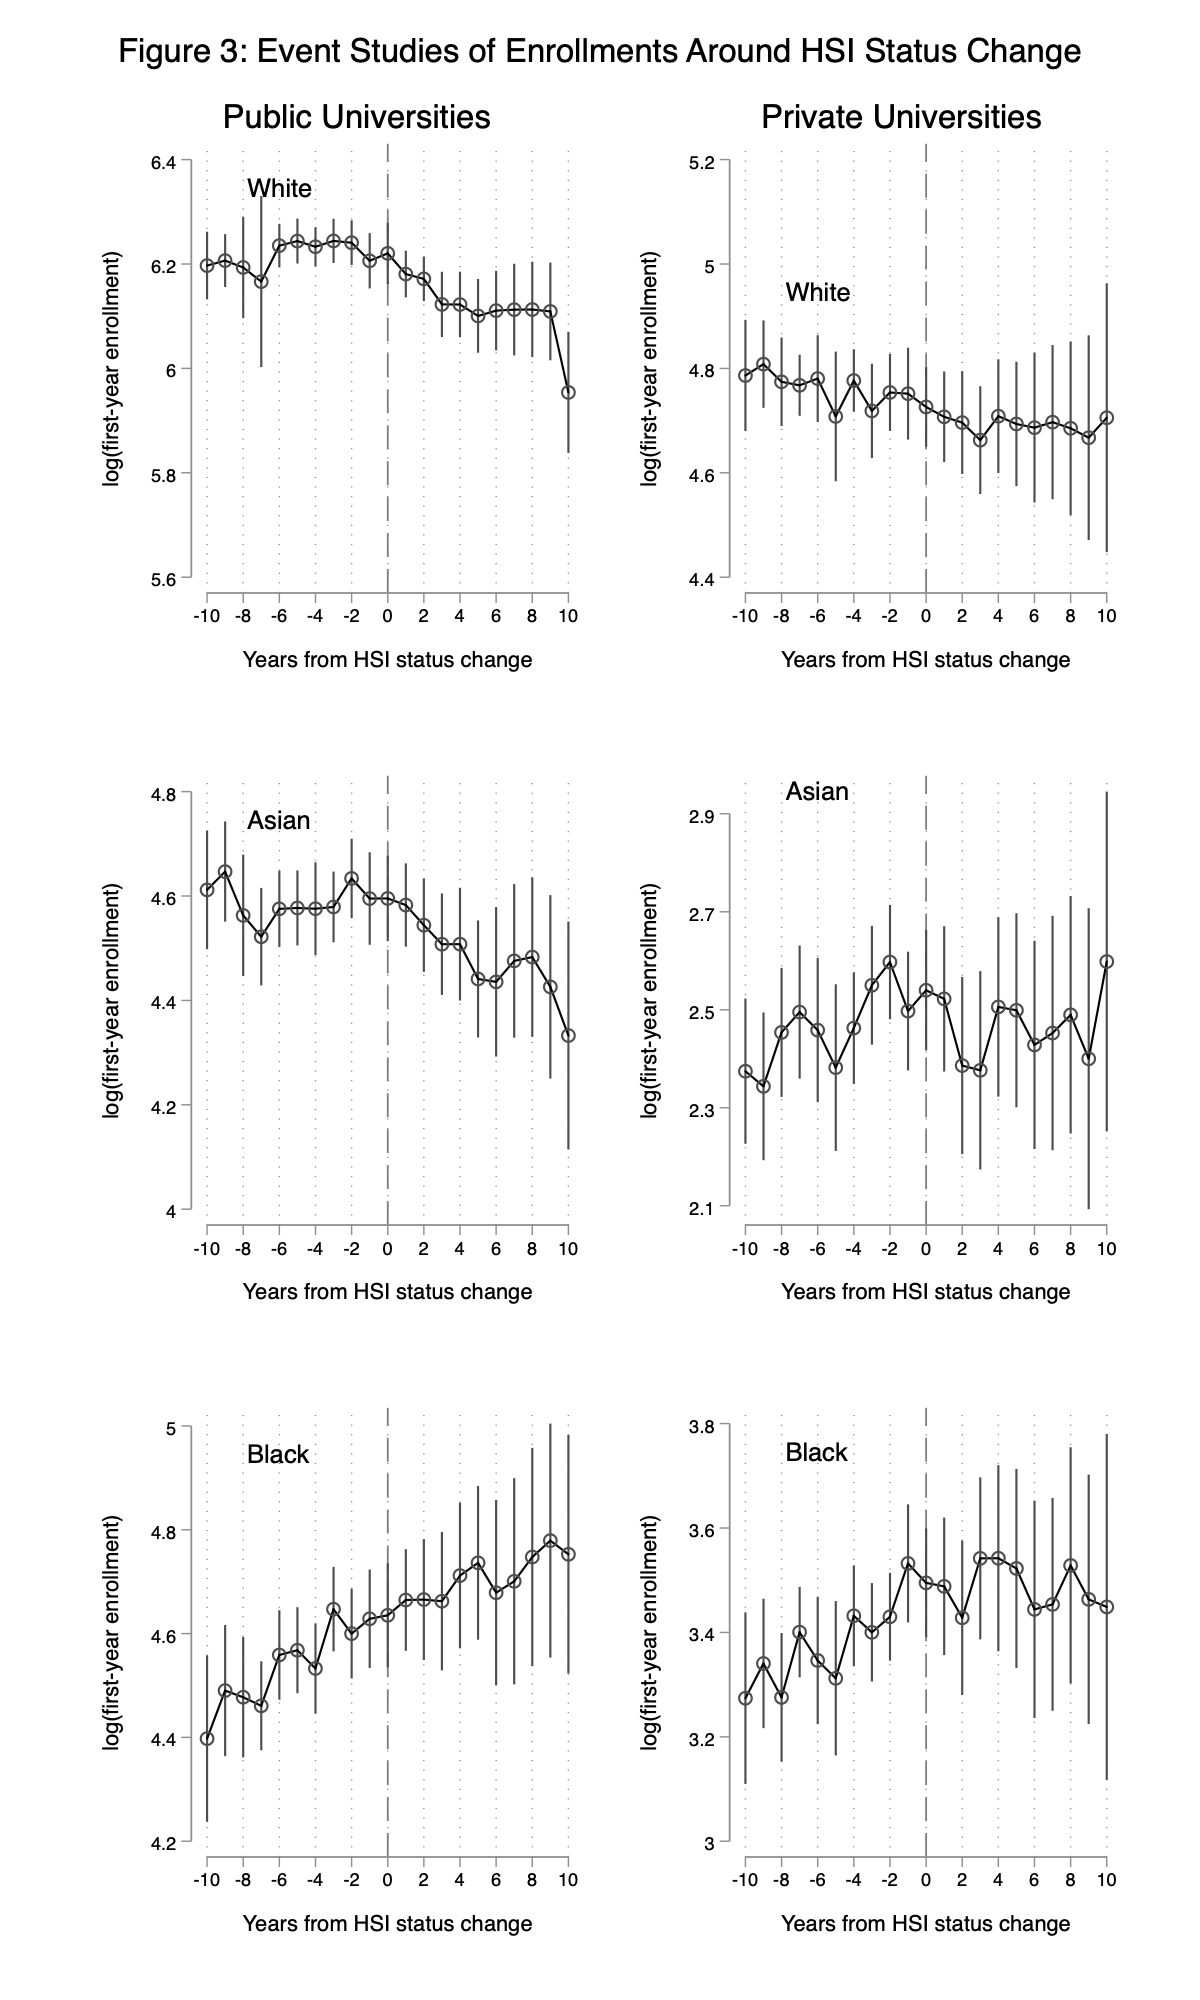

In [3]:
    graph combine r1c1Whitepub r1c2Whitepri r2c1Asianpub r2c2Asianpri r3c1Blackpub r3c2Blackpri, /// 
        col(2) xsize(6) ysize(10) iscale(*.9) imargin(medsmall) graphregion(margin(l=5 r=5)) ///
        title("Figure 3: Event Studies of Enrollments Around HSI Status Change", position(12) ///
        size(small) justification(center))

In [4]:
qui graph export figures/f3_eventstudiesbyrace.pdf, replace